In [12]:
from atomphys.data_utils.load_data import from_nist, from_json
from atomphys.electric_field import GaussianBeam
from atomphys.calc.ac_stark import ac_stark_shift, polarizability
import numpy as np
import matplotlib.pyplot as plt

# AC Stark Shifts & Polarizabilities

Atomphys can be also used to calculate the AC Stark shift and the polarizability of an atom in an electric field. In contrary to other tools, the electric field object can have an arbitrary amplitude profile and polarization.

In [2]:
Ca = from_json('../data/Ca_mills.json')
u = Ca._ureg

Loading atom Ca
Added 75 states
Added 811 transitions


In [3]:
Ca1S0 = Ca.get_state('1S0') # 4s4s
Ca3P1 = Ca.get_state('3P1') # 4s4p

states_of_interest = [Ca1S0, Ca3P1]

In [35]:
_532_laser = GaussianBeam(frequency=(532*u('nm')).to('THz', 'sp'), waist=1.5*u('um'), power=20*u('mW'), polarization=np.array([0, 0, 1]), direction_of_propagation=np.array([1, 0, 0]), _ureg=u)

In [36]:
ac_shift_1S0 = ac_stark_shift(state=Ca1S0, mJ=0, El_field=_532_laser, _ureg=u)
polarizability_1S0 = polarizability(state=Ca1S0, mJ=0, El_field=_532_laser, _ureg=u)

print(f"AC Stark shift of the 1S0 state: {ac_shift_1S0.to('hbar MHz')}")
print(f"Polarizability of the 1S0 state: {polarizability_1S0}")



AC Stark shift of the 1S0 state: -68.6 MHz·ħ
Polarizability of the 1S0 state: 412 a_0²·e²/E_h


# Let's do it for larger wavelengths range

In [37]:
# Remove transitions with A < 1 MHz to prevent vertical lines to appear in the plots
for state in states_of_interest:
    for tr in state.transitions:
        if tr.A < 1e6 * u('1/s'):
            Ca.remove_transition(tr)

In [38]:
Ca_min_wl, Ca_max_wl = 400, 1100
npoints = 10_000
Ca_wavelengths = np.linspace(Ca_min_wl, Ca_max_wl, npoints) * u('nm')

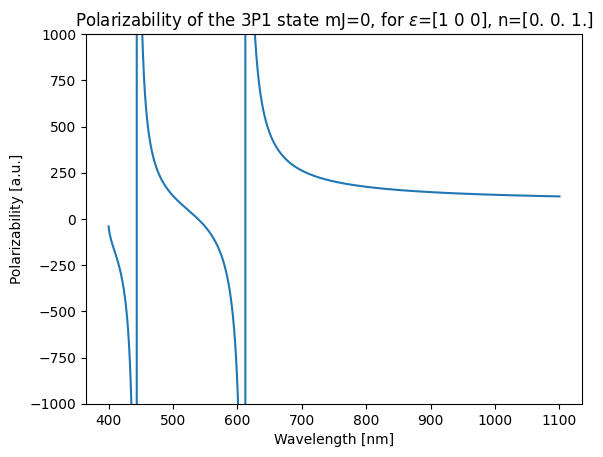

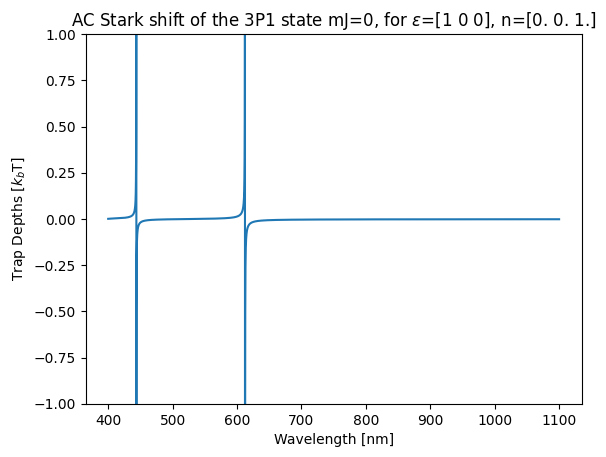

In [53]:
_532_laser = GaussianBeam(frequency=(532*u('nm')).to('THz', 'sp'), waist=10*u('um'), power=10*u('mW'), polarization=np.array([1, 0, 0]), direction_of_propagation=np.array([0, 0, 1]), _ureg=u)

polarizabilities_3P1 = polarizability(state=Ca3P1, mJ=0, El_field=_532_laser, _ureg=u, wavelengths=Ca_wavelengths)

plt.plot(Ca_wavelengths, polarizabilities_3P1)
plt.ylim(-1000,1000)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Polarizability [a.u.]')
plt.title(f'Polarizability of the 3P1 state mJ=0, for $\\varepsilon$={_532_laser.polarization}, n={_532_laser.direction_of_propagation}')
plt.show()

ac_shifts_3P1 = ac_stark_shift(state=Ca3P1, mJ=0, El_field=_532_laser, _ureg=u, wavelengths=Ca_wavelengths)

plt.plot(Ca_wavelengths, ac_shifts_3P1)
plt.ylim(-1,1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Trap Depths [$k_b$T]')
plt.title(f'AC Stark shift of the 3P1 state mJ=0, for $\\varepsilon$={_532_laser.polarization}, n={_532_laser.direction_of_propagation}')
plt.show()


# Rabi Frequencies

In [58]:
from atomphys.calc.rabi_frequency import Rabi_Frequency
Ca1S0 = Ca.get_state('1S0')
Ca1P1 = Ca.get_state('1P1')

_423_laser = GaussianBeam(frequency=(423*u('nm')).to('THz', 'sp'), waist=1*u('mm'), power=3*u('mW'), polarization=np.array([1, 0, 0]), direction_of_propagation=np.array([0, 0, 1]), _ureg=u)

Rabi_Frequency(E_field=_423_laser, transition=Ca.transition_between(Ca1S0, Ca1P1), mJ_i=0, mJ_f=1, _ureg=u)

(-194.0160714523234+0j) <Unit('megahertz')>